# Plots of oscilloscope records

In [1]:
import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob

## Read waveforms from the file

XINC: 9.999999e-08    YINC: 0.00025    FRAMES: 499    TRIG: 0.0117    YORIGIN: -95.0
1 , -0.00225 , 0.018 , 10.427
2 , -0.0065 , 0.013 , 5.45125
3 , -0.00825 , 0.0215 , 7.95225
4 , -0.0035 , 0.02325 , 15.619
5 , -0.00825 , 0.042 , 18.143
6 , -0.00125 , 0.0115 , 7.6335
7 , -0.00325 , 0.013 , 4.8825
8 , -0.00825 , 0.02875 , 9.38675
9 , -0.0015 , 0.0105 , 5.5695
10 , -0.00375 , 0.00875 , 3.1065
11 , -0.004 , 0.01425 , 5.50825
12 , -0.00825 , 0.033 , 13.983
13 , -0.00125 , 0.00975 , 4.37625
14 , -0.00175 , 0.02225 , 16.074
15 , -0.0055 , 0.01625 , 5.1745
16 , -0.00625 , 0.011 , 2.793
17 , -0.0025 , 0.01025 , 6.084
18 , -0.008 , 0.04175 , 18.63075
19 , -0.003 , 0.0205 , 14.4275
20 , -0.003 , 0.0105 , 6.87525
21 , -0.0035 , 0.01075 , 6.3715
22 , -0.00325 , 0.016 , 9.17425
23 , -0.0025 , 0.01 , 5.54925
24 , -0.00475 , 0.01075 , 3.4865
25 , -0.00625 , 0.01075 , 2.86225
26 , -0.00375 , 0.011 , 2.68275
27 , -0.0015 , 0.011 , 6.269
28 , -0.00325 , 0.01075 , 3.60075
29 , -0.002 , 0.01475 , 9.59175

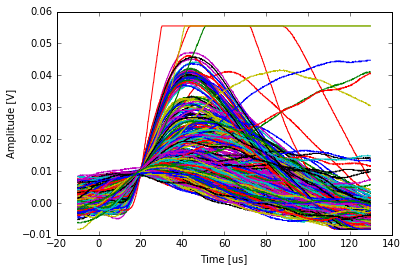

In [6]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np

for f in glob.iglob("./data/dat01_*-CHAN1.h5"): # generator, search immediate subdirectories 
    print '  ', f
    break

#with h5py.File('./data/data11.h5','r') as hf:
with h5py.File(f,'r') as hf:
    #print('List of arrays in this file: \n', hf.keys())
    print 'XINC:', np.array(hf.get('XINC')), '   YINC:', np.array(hf.get('YINC')), '   FRAMES:', np.array(hf.get('FRAMES')), '   TRIG:', np.array(hf.get('TRIG')), '   YORIGIN:', np.array(hf.get('YORIGIN'))
    frames = np.array(hf.get('FRAMES'))
    for n in range(1,frames+1):
        data = hf.get(str(n))
        np_data = 1.0 * np.array(data)
        #print 'np_data:', max(np_data)
        np_data = np_data - 128 - np.array(hf.get('YORIGIN'))
        np_data = np.array(hf.get('YINC')) * np_data    # to Volts
        np_time = range(0,1400)
        np_time *= np.array(hf.get('XINC'))
        np_time *= 1e6   # to microseconds
        np_time -= 10    # trigger time offset
        
        #print np_data
        maximum = 0
        minimum = 255
        suma = 0
        for i in range(1400):
            if np_data[i] > maximum:
                maximum = np_data[i]
            if np_data[i] < minimum:
                minimum = np_data[i]
            suma = suma + np_data[i]
            
        
        if n<30:
            print n,',', minimum,',', maximum,',', suma
        
        #if (np_data[170]-minimum < 0.001):
        #    plt.plot(np_time, np_data-minimum) 
        #plt.plot(np_time, np_data-np_data[0]) 
        plt.plot(np_time, np_data) 
        
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [V]')


## Parse all data files in current directory
Read in all the data files in current directory and process them into a histogram.

   ./data/data313_1546932162-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 49.09
   ./data/data164_1546914156-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 46.09
   ./data/data275_1546927542-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 42.19
   ./data/data299_1546930477-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 47.19
   ./data/data60_1546901674-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 48.65
   ./data/data238_1546923036-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 47.97
   ./data/data186_1546916797-CHAN1.h5
XINC: 9.999999e-08  Y

   ./data/data272_1546927174-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 45.79
   ./data/data107_1546907316-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 42.83
   ./data/data27_1546897595-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 44.94
   ./data/data64_1546902156-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 46.15
   ./data/data142_1546911515-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 44.51
   ./data/data253_1546924836-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 44.83
   ./data/data02_1546894608-CHAN1.h5
XINC: 9.999999e-08  YIN

   ./data/data182_1546916317-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 44.04
   ./data/data249_1546924355-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 41.93
   ./data/data193_1546917636-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 44.45
   ./data/data170_1546914876-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 43.83
   ./data/data167_1546914516-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 45.27
   ./data/data334_1546934678-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 44.9
   ./data/data24_1546897237-CHAN1.h5
XINC: 9.999999e-08  YI

   ./data/data347_1546936237-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 45.88
   ./data/data146_1546911995-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 48.93
   ./data/data127_1546909716-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 43.23
   ./data/data269_1546926816-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 41.25
   ./data/data134_1546910555-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 44.68
   ./data/data348_1546936358-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 42.84
   ./data/data327_1546933836-CHAN1.h5
XINC: 9.999999e-08  

   ./data/data305_1546931200-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 45.88
   ./data/data144_1546911756-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 46.51
   ./data/data45_1546899834-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 45.04
   ./data/data145_1546911877-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 42.5
   ./data/data293_1546929756-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 43.65
   ./data/data195_1546917876-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 44.55
   ./data/data226_1546921601-CHAN1.h5
XINC: 9.999999e-08  YI

   ./data/data308_1546931558-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 46.87
   ./data/data264_1546926155-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 41.01
   ./data/data200_1546918476-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 44.23
   ./data/data349_1546936477-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 42.06
   ./data/data88_1546905038-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 40.85
   ./data/data03_1546894726-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 41.03
   ./data/data283_1546928525-CHAN1.h5
XINC: 9.999999e-08  YI

   ./data/data212_1546919917-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 44.8
   ./data/data354_1546937080-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 43.85
   ./data/data43_1546899587-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 45.36
   ./data/data162_1546913916-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 44.06
   ./data/data312_1546932041-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 46.84
   ./data/data295_1546929997-CHAN1.h5
XINC: 9.999999e-08  YINC: 0.00025  FRAMES: 499  XORIGIN: -3.019999e-05  YORIGIN: -95.0  TRIG: 0.01074
CAPTURING: 45.47
   ./data/data257_1546925316-CHAN1.h5
XINC: 9.999999e-08  YI

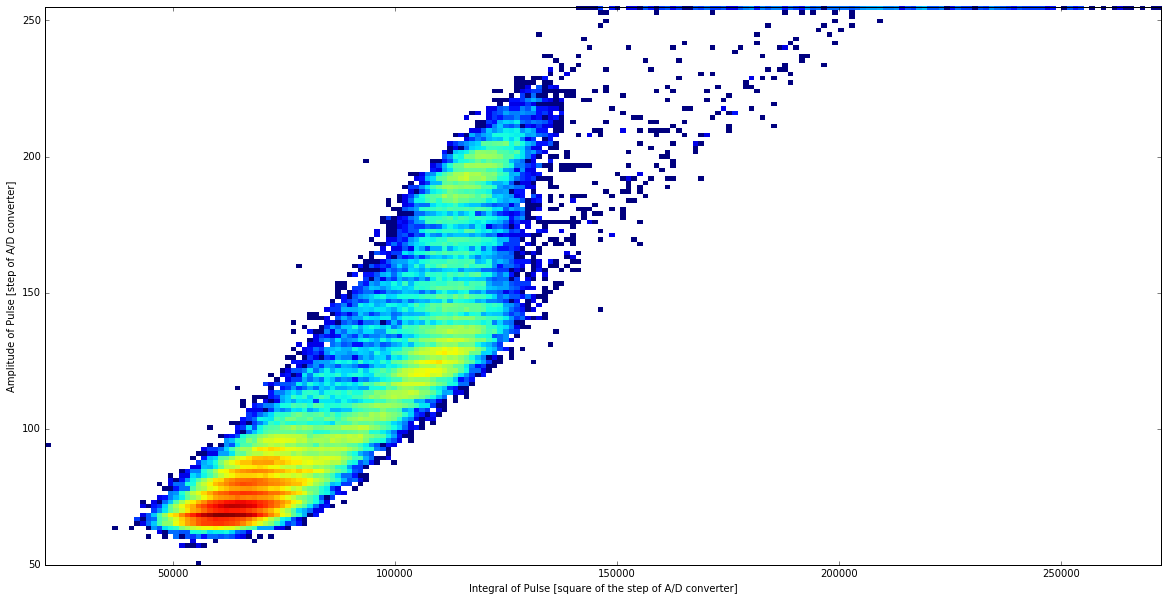

In [33]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if (maximum < 256):
            #if (maximum < 254):
                x.append(maximum)
                #x.append(maximum-np_data[2])
                #x.append(maximum-np_data[30])
                #y.append(suma/maximum)
                y.append(suma)
                z.append(minimum)
     
for f in glob.iglob("./data/data*.h5"): # generator, search immediate subdirectories 
    print '  ', f
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print '  ', f
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(figsize=(20,10))

ble = plt.hist2d(y, x, bins=(200,128), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,200),  cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
#cb = plt.colorbar()
#cb.set_label('Count')

#plt.plot([0,10000],[100,100],ls='-',c='r',marker='o')
#plt.plot([0,100000],[100,1000],c='r',lw=3,zorder=99)
#plt.xlim(60000,160000)
#plt.ylim(50,150)
plt.show()

In [6]:
np.std(x)

7.2204956677864809

/usr/lib/python2.7/dist-packages/matplotlib/colors.py:1021: RuntimeWarning: divide by zero encountered in log
  resdat -= np.log(vmin)
/usr/lib/python2.7/dist-packages/matplotlib/colors.py:1022: RuntimeWarning: divide by zero encountered in log
  resdat /= (np.log(vmax) - np.log(vmin))
/usr/lib/python2.7/dist-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (np.log(vmax) - np.log(vmin))


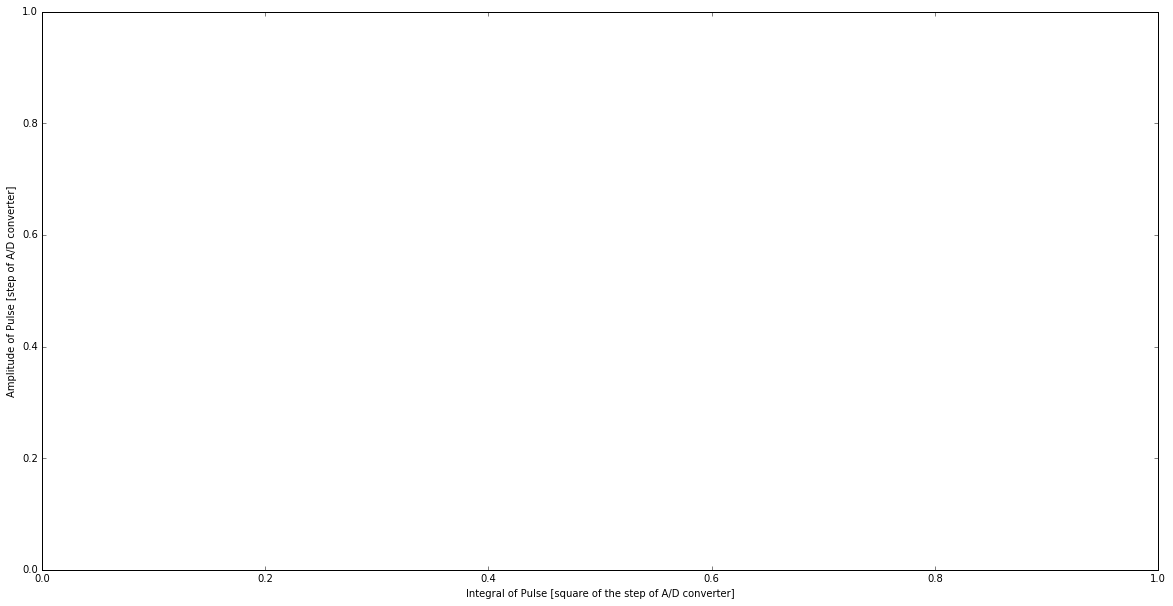

In [8]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if (maximum < 256):
            #if (maximum < 254):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for f in glob.iglob("./compare/data*.h5"): # generator, search immediate subdirectories 
    print '  ', f
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print '  ', f
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass


    
plt.figure(figsize=(20,10))



ble = plt.hist2d(y, x, bins=(500,129), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,200),  cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
#cb = plt.colorbar()
#cb.set_label('Count')

#plt.plot([0,10000],[100,100],ls='-',c='r',marker='o')
#plt.plot([0,100000],[100,1000],c='r',lw=3,zorder=99)
#plt.xlim(60000,160000)
#plt.ylim(50,150)
plt.show()


# Simply replot the current x, y in a nicer way

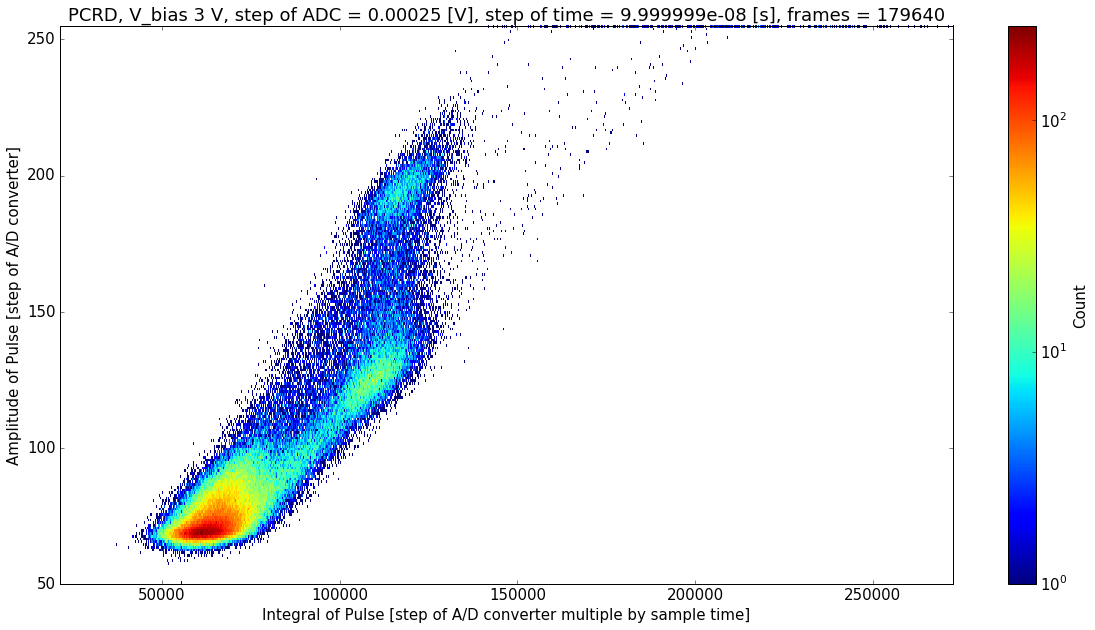

In [39]:
matplotlib.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))

#ble = plt.hist2d(y, x, bins=(1000,250-50),range=np.array([(70000,160000),(50,250)]), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
ble = plt.hist2d(y, x, bins=(1000,205), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(100,30),range=np.array([(70000, 80000),(50,80)]), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [step of A/D converter multiple by sample time]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
#plt.ylim(68,255)
plt.title('PCRD, V_bias 3 V, step of ADC = ' + str(yinc) + ' [V], step of time = ' + str(xinc) + ' [s], frames = '+ str(all_frames))
cb = plt.colorbar()
cb.set_label('Count')

## Flat histogram (only X or Y)

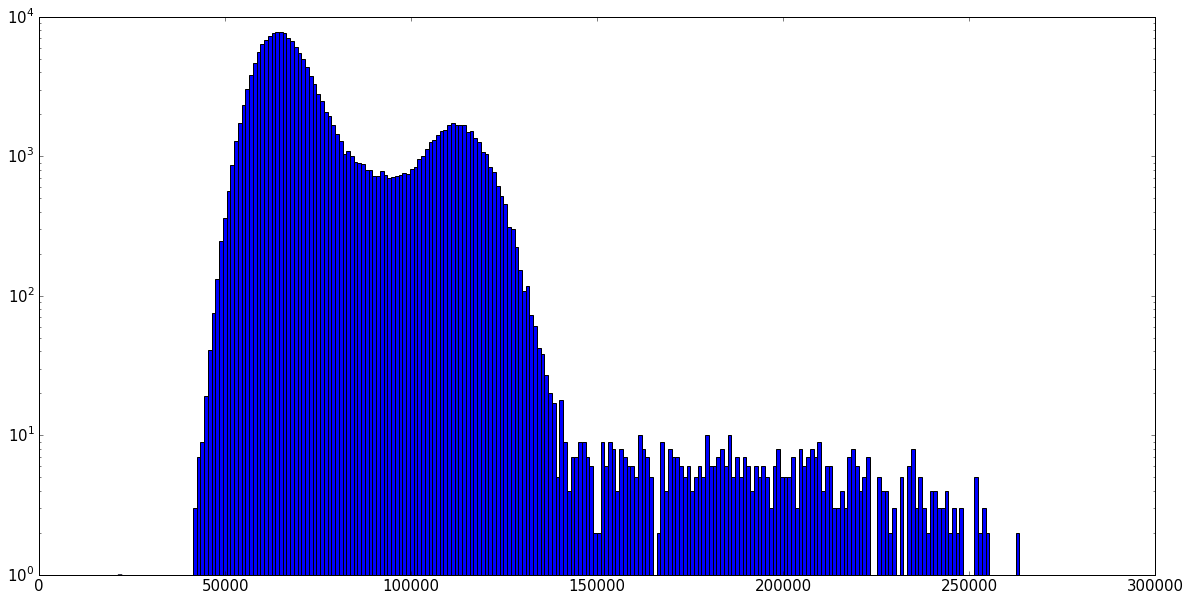

In [40]:
matplotlib.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))

ble = plt.hist(y, bins=250)
plt.yscale('log')
#plt.xscale('log')
#plt.ylim(0,200)


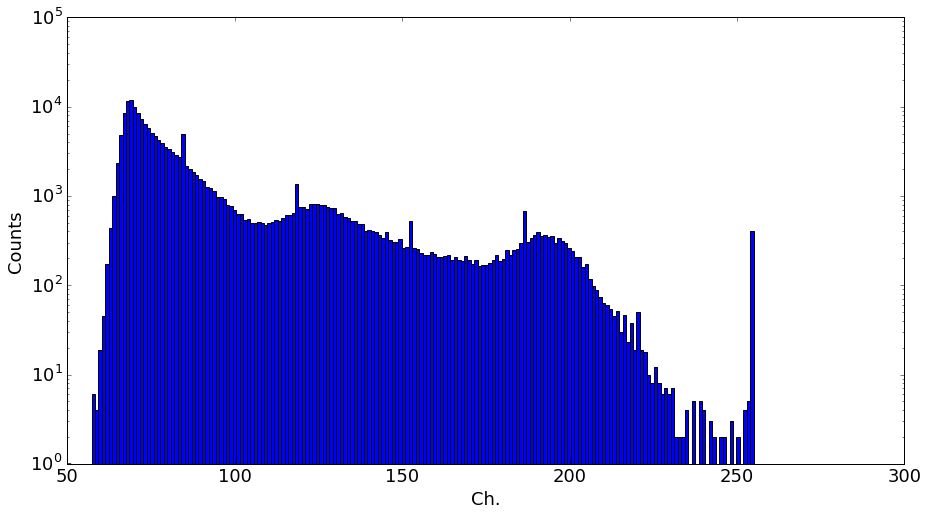

In [41]:
matplotlib.rcParams.update({'font.size': 18})
plt.figure(figsize=(15,8))

ble = plt.hist(x, bins=199)
plt.yscale('log')
#plt.xscale('log')
#plt.ylim(0,200)
plt.xlabel('Ch.')
plt.ylabel('Counts')


## Cut Plot

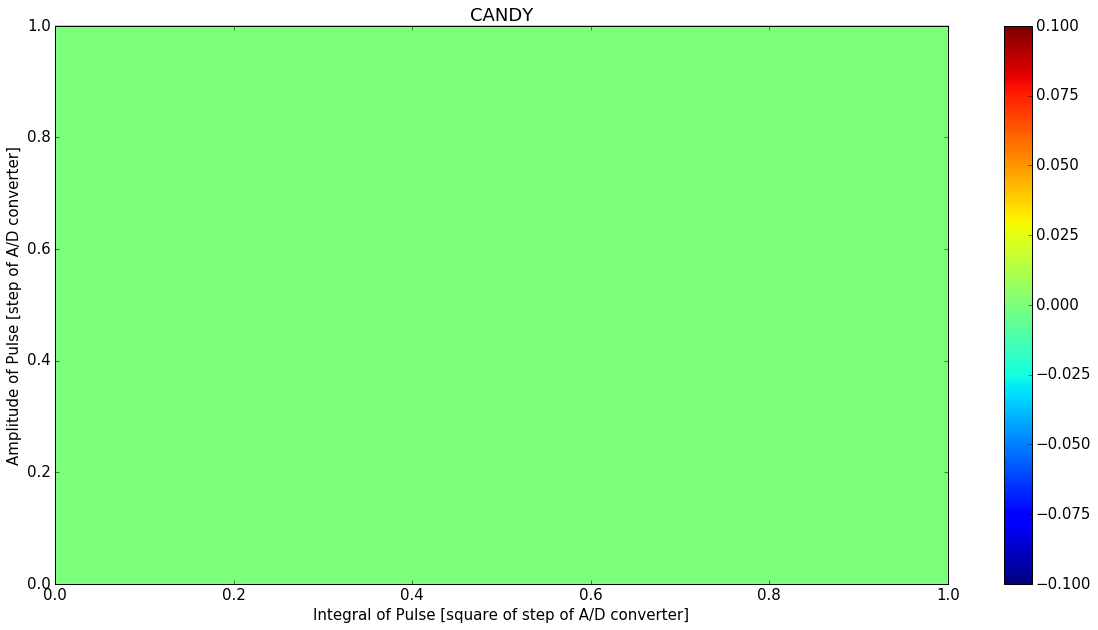

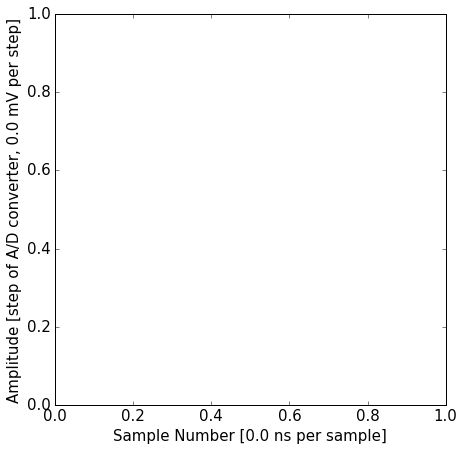

In [8]:
matplotlib.rcParams.update({'font.size': 15})

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
            

def Cut(maxmax,minmin,colour):
    for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]

                    if (maximum <= maxmax) and (maximum >= minmin):
                        plt.plot(np_data, c=colour)
        except:        
            pass

     
for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(1,figsize=(20,10))
matplotlib.rc('axes',edgecolor='black')

#ble = plt.hist2d(y, x, bins=(500,128), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
ble = plt.hist2d(y, x, bins=(500,128),  cmap=plt.cm.jet)
#plt.xlim(60000,125000)
#plt.ylim(50,225)
plt.title('CANDY')
plt.xlabel('Integral of Pulse [square of step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
cb = plt.colorbar()

maxmax1 = 100
maxmax2 = 100
maxmax3 = 100
maxmax4 = 46
maxmax5 = 35
width = 1

minmin1 = maxmax1-width
plt.plot([0,150000],[maxmax1,maxmax1],c='r',lw=1,zorder=99)
plt.plot([0,150000],[minmin1,minmin1],c='r',lw=1,zorder=99)

minmin2 = maxmax2-width
plt.plot([0,150000],[maxmax2,maxmax2],c='g',lw=1,zorder=99)
plt.plot([0,150000],[minmin2,minmin2],c='g',lw=1,zorder=99)

minmin3 = maxmax3-width
plt.plot([0,150000],[maxmax3,maxmax3],c='purple',lw=1,zorder=99)
plt.plot([0,150000],[minmin3,minmin3],c='purple',lw=1,zorder=99)

minmin4 = maxmax4-width
plt.plot([0,150000],[maxmax4,maxmax4],c='orange',lw=1,zorder=99)
plt.plot([0,150000],[minmin4,minmin4],c='orange',lw=1,zorder=99)

minmin5 = maxmax5-width
plt.plot([0,150000],[maxmax5,maxmax5],c='grey',lw=1,zorder=99)
plt.plot([0,150000],[minmin5,minmin5],c='grey',lw=1,zorder=99)

plt.figure(2,figsize=(7,7))
#matplotlib.rc('axes',edgecolor='r')
Cut(maxmax1,minmin1,'r')
Cut(maxmax2,minmin2,'g')
Cut(maxmax3,minmin3,'purple')
Cut(maxmax4,minmin4,'orange')
Cut(maxmax5,minmin5,'grey')

plt.xlabel('Sample Number ['+ str(xinc*1e9)+' ns per sample]')
plt.ylabel('Amplitude [step of A/D converter, '+ str(yinc*1e3) + ' mV per step]')

plt.show()

In [31]:
matplotlib.rcParams.update({'font.size': 15})

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
            

def Cut(maxmax,minmin,colour):
    for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    suma = 0
                    colour = 'black'
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]
                        suma = suma + np_data[i]
                        
                    if (maximum <= maxmax) and (maximum >= minmin):
                        if (suma>0) and (suma<73000):
                            colour = 'red'
                        if (suma>73000) and (suma<82000):
                            colour = 'green'
                        if (suma>82000) and (suma<100000):
                            colour = 'purple'
                        if (suma>100000) and (suma<150000):
                            colour = 'orange'
                        plt.plot(np_data, c=colour)
        except:        
            pass

     
for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(1,figsize=(20,10))
matplotlib.rc('axes',edgecolor='black')
plt.xlim(42000,175000)
plt.ylim(35,130)

ble = plt.hist2d(y, x, bins=(500,128), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.title('CANDY x CERF')
plt.xlabel('Integral of Pulse [square of step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
cb = plt.colorbar()

maxmax1 = 190
maxmax2 = 167
maxmax3 = 123
maxmax4 = 105
maxmax5 = 60
width = 4

minmin1 = maxmax1-width
#plt.plot([0,175000],[maxmax1,maxmax1],c='r',lw=1,zorder=99)
#plt.plot([0,175000],[minmin1,minmin1],c='r',lw=1,zorder=99)

minmin2 = maxmax2-width
#plt.plot([0,175000],[maxmax2,maxmax2],c='g',lw=1,zorder=99)
#plt.plot([0,175000],[minmin2,minmin2],c='g',lw=1,zorder=99)

minmin3 = maxmax3-width
plt.plot([0,175000],[maxmax3,maxmax3],c='purple',lw=1,zorder=99)
plt.plot([0,175000],[minmin3,minmin3],c='purple',lw=1,zorder=99)

minmin4 = maxmax4-width
#plt.plot([0,175000],[maxmax4,maxmax4],c='orange',lw=1,zorder=99)
#plt.plot([0,175000],[minmin4,minmin4],c='orange',lw=1,zorder=99)

minmin5 = maxmax5-width
#plt.plot([0,175000],[maxmax5,maxmax5],c='grey',lw=1,zorder=99)
#plt.plot([0,175000],[minmin5,minmin5],c='grey',lw=1,zorder=99)

plt.figure(2,figsize=(7,7))
#matplotlib.rc('axes',edgecolor='r')
#Cut(maxmax1,minmin1,'r')
#Cut(maxmax2,minmin2,'g')
Cut(maxmax3,minmin3,'purple')
#Cut(maxmax4,minmin4,'orange')
#Cut(maxmax5,minmin5,'grey')

plt.xlabel('Sample Number ['+ str(xinc*1e9)+' ns per sample]')
plt.ylabel('Amplitude [step of A/D converter, '+ str(yinc*1e3) + ' mV per step]')

plt.show()

ValueError: Data has no positive values, and therefore can not be log-scaled.

Error in callback <function post_execute at 0x7f9fa8f44848> (for post_execute):


ValueError: values must all be positive

ValueError: values must all be positive

## Vertical Cut

In [32]:
matplotlib.rcParams.update({'font.size': 15})

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
            

def Cut(maxmax,minmin,colour):
    for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    suma = 0
                    colour = 'black'
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]
                        suma = suma + np_data[i]
                        
                    if (maximum <= maxmax) and (maximum >= minmin):
                        if (suma>0) and (suma<73000):
                            colour = 'purple'
                        if (suma>73000) and (suma<82000):
                            print suma, "."
                            colour = 'red'
                        if (suma>82000) and (suma<100000):
                            print suma
                            colour = 'green'
                        if (suma>100000) and (suma<150000):
                            colour = 'orange'
                        plt.plot(np_data, c=colour)
        except:        
            pass

def VCut(maxmax,minmin,colour):
    for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    suma = 0
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]
                        suma = suma + np_data[i]
                        
                    if (suma<=maxmax) and (suma>=minmin):
                        #print maximum
                        colour = 'green'
                        if (maximum>70):
                            colour = 'red'
                            
                        plt.plot(np_data, c=colour)
        except:        
            pass

     
for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(1,figsize=(20,10))
matplotlib.rc('axes',edgecolor='black')
plt.xlim(42000,175000)
plt.ylim(35,130)

ble = plt.hist2d(y, x, bins=(500,128), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.title('Protons X Photons')
plt.xlabel('Integral of Pulse [square of step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
cb = plt.colorbar()

maxmax1 = 81000
maxmax2 = 167
maxmax3 = 80
maxmax4 = 105
maxmax5 = 60
width = 1

minmin1 = maxmax1-1000
plt.plot([maxmax1,maxmax1],[0,250],c='r',lw=1,zorder=99)
plt.plot([minmin1,minmin1],[0,250],c='r',lw=1,zorder=99)

minmin2 = maxmax2-width
#plt.plot([0,175000],[maxmax2,maxmax2],c='g',lw=1,zorder=99)
#plt.plot([0,175000],[minmin2,minmin2],c='g',lw=1,zorder=99)

minmin3 = maxmax3-width
plt.plot([0,175000],[maxmax3,maxmax3],c='purple',lw=1,zorder=99)
plt.plot([0,175000],[minmin3,minmin3],c='purple',lw=1,zorder=99)

minmin4 = maxmax4-width
#plt.plot([0,175000],[maxmax4,maxmax4],c='orange',lw=1,zorder=99)
#plt.plot([0,175000],[minmin4,minmin4],c='orange',lw=1,zorder=99)

minmin5 = maxmax5-width
#plt.plot([0,175000],[maxmax5,maxmax5],c='grey',lw=1,zorder=99)
#plt.plot([0,175000],[minmin5,minmin5],c='grey',lw=1,zorder=99)

plt.figure(2,figsize=(7,7))
#matplotlib.rc('axes',edgecolor='r')
#Cut(maxmax1,minmin1,'r')
#Cut(maxmax2,minmin2,'g')
Cut(maxmax3,minmin3,'purple')
#Cut(maxmax4,minmin4,'orange')
#Cut(maxmax5,minmin5,'grey')

plt.xlabel('Sample Number ['+ str(xinc*1e9)+' ns per sample]')
plt.ylabel('Amplitude [step of A/D converter, '+ str(yinc*1e3) + ' mV per step]')

plt.figure(3,figsize=(7,7))
#matplotlib.rc('axes',edgecolor='r')
#Cut(maxmax1,minmin1,'r')
#Cut(maxmax2,minmin2,'g')
VCut(maxmax1,minmin1,'purple')
#Cut(maxmax4,minmin4,'orange')
#Cut(maxmax5,minmin5,'grey')

plt.xlabel('Sample Number ['+ str(xinc*1e9)+' ns per sample]')
plt.ylabel('Amplitude [step of A/D converter, '+ str(yinc*1e3) + ' mV per step]')

plt.show()

ValueError: Data has no positive values, and therefore can not be log-scaled.

Error in callback <function post_execute at 0x7f9fa8f44848> (for post_execute):


ValueError: values must all be positive

ValueError: values must all be positive

## Limited maximum histogram

./data/data40_1538561816-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data22_1538560556-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data15_1538559989-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data09_1538559561-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data14_1538559914-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data10_1538559633-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data23_1538560624-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data18_1538560275-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data13_1538559846-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data37_1538561604-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data32_1538561255-CHAN1.h5 XINC: 5e-09  YINC: 0.0008  FRAMES: 508  YORIGIN: -87.0
./data/data11_1538559

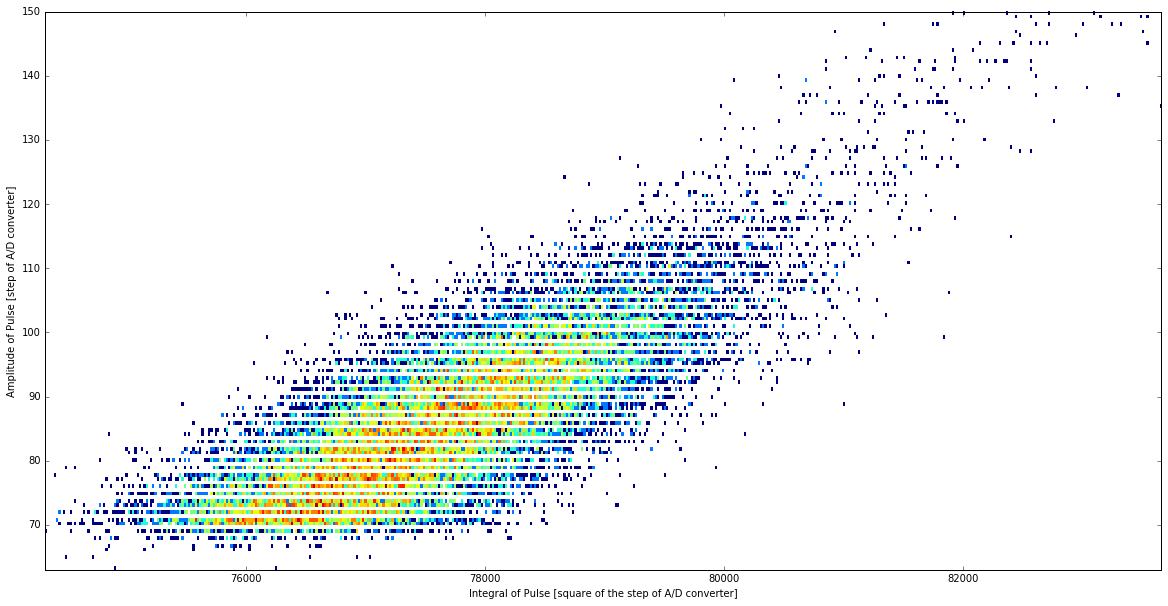

In [33]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if (maximum < 151):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for f in glob.iglob("./data/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass


    
plt.figure(figsize=(20,10))



ble = plt.hist2d(y, x, bins=(500,150), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,200),  cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
#cb = plt.colorbar()
#cb.set_label('Count')

#plt.plot([0,10000],[100,100],ls='-',c='r',marker='o')
#plt.plot([0,100000],[100,1000],c='r',lw=3,zorder=99)
#plt.xlim(60000,160000)
#plt.ylim(50,150)
plt.show()


## Histogram for oscilloscope B

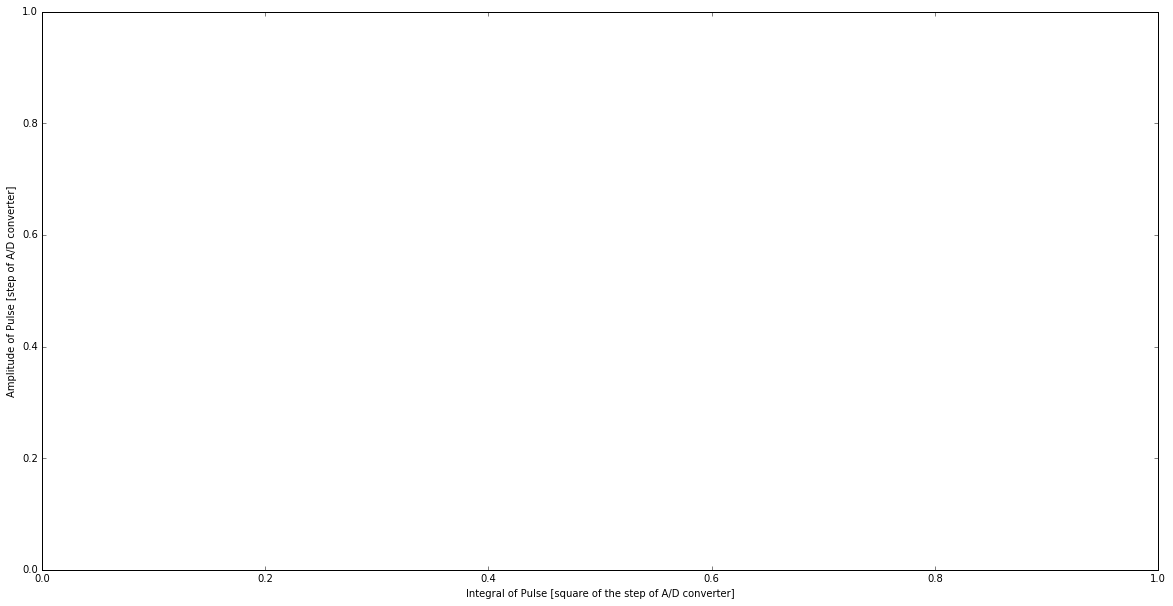

In [34]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        xorigin = np.array(hf.get('XORIGIN'))
        trig = np.array(hf.get('TRIG'))
        capturing = np.array(hf.get('CAPTURING'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' XORIGIN:', xorigin, ' YORIGIN:', yorigin, ' TRIG:', trig        
        print 'CAPTURING:', capturing         
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            if (maximum < 256):
            #if (maximum < 254):
                x.append(maximum)
                #y.append(suma/maximum)
                y.append(suma)
                z.append((maximum))
     
for f in glob.iglob("./dataB/data*.h5"): # generator, search immediate subdirectories 
    print '  ', f
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

for f in glob.iglob("./dataB/**/data*.h5"): # generator, search immediate subdirectories 
    print '  ', f
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass


    
plt.figure(figsize=(20,10))



ble = plt.hist2d(y, x, bins=(500,129), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,200),  cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
#cb = plt.colorbar()
#cb.set_label('Count')

#plt.plot([0,10000],[100,100],ls='-',c='r',marker='o')
#plt.plot([0,100000],[100,1000],c='r',lw=3,zorder=99)
#plt.xlim(60000,160000)
#plt.ylim(50,150)
plt.show()
